# Zentraler Grenzwertsatz

## Verbundwahrscheinlichkeit 

Die Verbundwahrscheinlichkeit $P(x,y)$ ist die Wahrscheinlichkeit für das gleichzeitige Auftreten der Bedingung $x(k)\le x$ und $y(k)\le y$

$$P(x,y)=\operatorname{Prob}(x(k)\le x \quad \rm{und} \quad y(k)\le y)$$

Die Verbundwahrscheinlichkeitsdichte $p(x,y)$ ist definiert als

$$p(x,y)=\lim_{\substack{\Delta x\to 0\\\Delta y\to 0}}\left(\frac{\operatorname{Prob}(x<x(k)\le x+\Delta x \quad \rm{und} \quad y<y(k)\le y+\Delta y)}{\Delta x \Delta y }\right)$$

Es gilt

$$p(x)=\int_{-\infty}^{\infty} p(x,y) dy$$

$$p(y)=\int_{-\infty}^{\infty} p(x,y) dx$$

## Summe zweier gleichverteilter Zufallsvariablen

Gegeben seien zwei gleichverteilte (auch rechteckverteilt genannt), unabhängige Zufallsvariablen $x$ und $y$

$$p_1(x)=\begin{cases}
  \frac 1{a} & 0 \le x \le a\\
  0            & \text{sonst}
\end{cases}$$


$$p_2(y)=\begin{cases}
  \frac 1{a} & 0 \le y \le a\\
  0            & \text{sonst}
\end{cases}$$


Für die Summe der Zufallsvariablen $z(k)=x(k)+y(k)$ ergibt sich die Verbundwahrscheinlichkeitsdichte $p(x,y)$

$$p(x,y)=p(x,z-x)$$

und die Wahrscheinlichkeitsdichteverteilung $p(z)$

$$p(z)=\int_{-\infty}^{\infty} p(x,z-x)dx$$

Für unabhängige Zufallsvariablen $x,y$ gilt 

$$p(x,y)=p_1(x)p_2(y)=p_1(x)p_2(z-x)$$

und somit

$$p(z)=\int_{-\infty}^{\infty} p_1(x)p_2(z-x)dx$$

Es folgt  

$$p(z)=\begin{cases}
  \frac{z}{a^2} & 0\le z \le a\\
  \frac{2a-z}{a^2} & a\le z \le 2a\\
  0            & \text{sonst}
\end{cases}$$

Die Summe zweier gleichverteilter, unabhängiger Variablen gehorcht also einer Dreiecksverteilung. 

## Zentraler Grenzwertsatz 

Es lässt sich zeigen, dass sich die Verteilungsfunktion für eine Summe unabhängiger Zufallsvariablen einer Gaußverteilung nähert. Dies ist die Aussage des Zentralen Grenzwertsatzes:

**Die Summe unabhängiger Zufallsvariablen (mit endlicher Varianz) folgt asmptotisch einer Gaußverteilung**

Im Folgenden zeigen wir exemplarisch die Gültigkeit anhand von numerischen Experimenten und verzichten auf einen mathematischen Beweis. Der Beweis kann mit Hilfe von charakteristische Funktionen (inverse Fouriertransformation der Verteilung) geführt werden. 

## Beispiel  Summe zweier gleichverteilter Zufallsvariablen

Seien $x_1$ und $x_2$ zwei im Wertebereich [0,1] gleichverteilte Zufallsvariablen. Es sei $S_2$ die Summe aus den Zufallsvariablen $x_1$ und $x_2$. 

Die Zufallsvariable $S_2$ weist eine Dreiecksverteilung auf, wie das folgende Exeriment belegt.

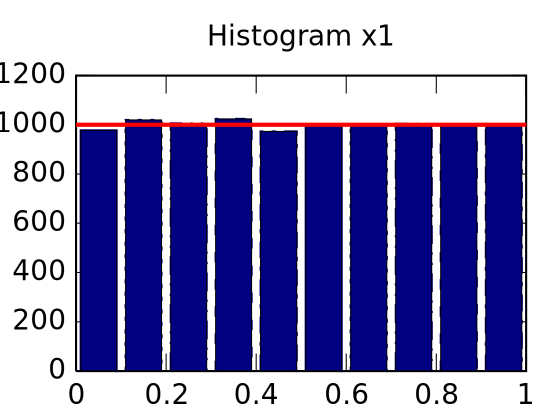

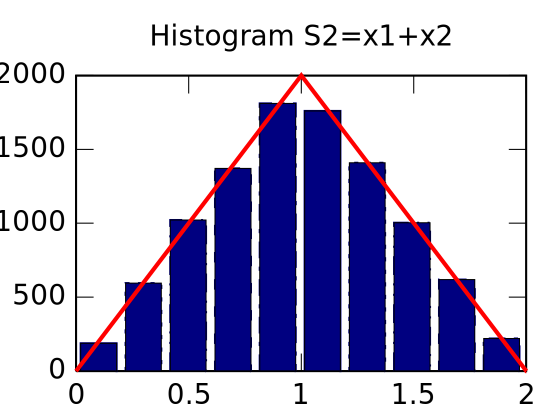

In [210]:
N=10000; % Anzahl der Realisationen
a=1;
x1=rand(N,1)*a;
x2=rand(N,1)*a;

hist(x1,10);
hold();
title('Histogram x1')
plot([0,a],[N/10,N/10],'r-','LineWidth',2)
figure()
hist(x1+x2);
hold();
title('Histogram S2=x1+x2')
plot([0,a,2*a],[0,2*N/10,0],'r-','LineWidth',2)

## Beispiel Summe $N$ gleichverteilter Zufallsvariablen
Die Summe $S_N=\sum_{i=1}^N x_i$ einer Reihe gleichverteilter Zufallsvariablen nähert sich mit steigendem N schnell einer Gausverteilung. Die standardisierte Zufallsvariable $Z$

$$Z=\frac{S_N-\mu_{S_N}}{\sigma_{S_N}}$$

folgt einer Normalverteilung. Dieses Beispiel zeigt die Bedeutung der Normalverteilung für die Statistik, denn jede Summe von Zufallsvariablen folgt im Grenzfall für große $N$ einer Gauß- bzw. nach Standardisierung einer Normalverteilung.

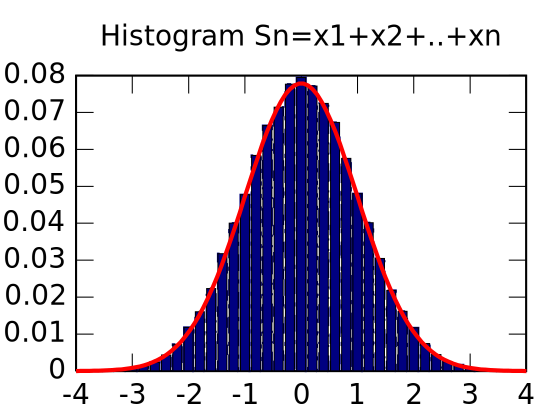

In [192]:
N=100000; % Anzahl Realisierungen von x
M=12; % Anzahl Summation

% Summe
S=rand(N,1)*2-1;
for i=1:M
    S=S+rand(N,1)*2-1; 
end

%Standardisierung
Z=(S-mean(S))/std(S);

Nbins=41;
Xbins=linspace(-4,4,Nbins);
hist(Z,Xbins,1);
x=linspace(-4,4,100);
y=normpdf(x,0,1)/Nbins*8;
hold()
plot(x,y,'r-','LineWidth',2)
xlim([-4,4])
title('Histogram Sn=x1+x2+..+xn')